In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt 

In [3]:
dataset = pd.read_csv('data.csv')
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
x_scaled = scaler.fit_transform(x)

def normalize(x):
    x_min = x.min()
    x_max = x.max()
    x_normalized = (x - x_min) / (x_max - x_min)
    return x_normalized

def standardize(x):
    return (x - np.mean(x)) / np.std(x)

#def destandardize(x, x_ref):
#    return

x = normalize(x)

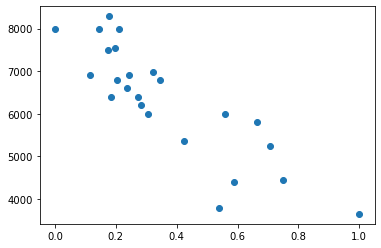

In [5]:
plt.scatter(x, y)

In [6]:
print(x.shape)
y = y.reshape(y.shape[0],1)
print(y.shape)

(24, 1)
(24, 1)


In [7]:
X = np.hstack((x, np.ones(x.shape)))
X.shape

(24, 2)

In [8]:
X

array([[1.        , 1.        ],
       [0.53846366, 1.        ],
       [0.58774948, 1.        ],
       [0.74910295, 1.        ],
       [0.70520633, 1.        ],
       [0.42330989, 1.        ],
       [0.66282974, 1.        ],
       [0.30447119, 1.        ],
       [0.56011257, 1.        ],
       [0.28144044, 1.        ],
       [0.27236171, 1.        ],
       [0.18498763, 1.        ],
       [0.23537893, 1.        ],
       [0.34362347, 1.        ],
       [0.20313587, 1.        ],
       [0.24470638, 1.        ],
       [0.11670144, 1.        ],
       [0.3228958 , 1.        ],
       [0.17526405, 1.        ],
       [0.19702811, 1.        ],
       [0.1432559 , 1.        ],
       [0.21004509, 1.        ],
       [0.        , 1.        ],
       [0.17913321, 1.        ]])

In [9]:
theta = np.random.randn(2, 1)

In [10]:
theta.shape

(2, 1)

In [11]:
theta

array([[-0.07509346],
       [-0.39901818]])

In [12]:
def model(X, theta):
    return X.dot(theta)

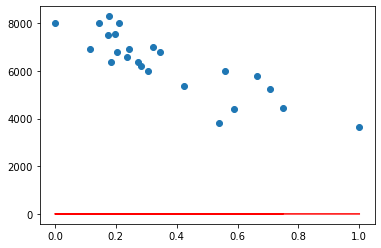

In [13]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')

In [14]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)


In [15]:
cost_function(X, y, theta)

20883197.368673287

In [16]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [35]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

In [48]:
learning_rate=0.01
n_iterations=2000
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [49]:
print(X.shape)
print(theta.shape)
print(theta_final)

(24, 2)
(2, 1)
[[-2165.32301126]
 [ 7064.60365438]]


In [50]:
print(theta_final.shape)
theta_final = theta_final.reshape(2, 1)

(2, 1)


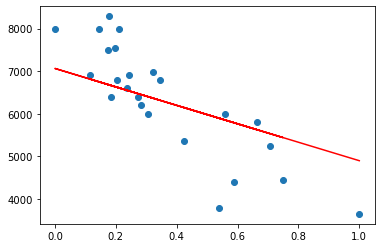

In [51]:

predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

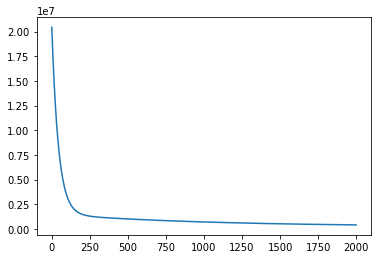

In [52]:
plt.plot(range(n_iterations), cost_history)

In [53]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [54]:
coef_determination(y, predictions)

0.5218649394068277

In [55]:
theta_final

array([[-2165.32301126],
       [ 7064.60365438]])